In [69]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'tf'

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
label=['airplane','car','cat','dog','flower','fruit','motorbike','person']

In [0]:
import glob #airplane images retrieving
import cv2
train_images=[]
c=0
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/airplane/*.jpg'):
    imagenormal = cv2.imread(filename)
    output = cv2.resize(imagenormal, (28,28))
    train_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/car/*.jpg'):#car images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,1])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/cat/*.jpg'):#cat images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,2])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/dog/*.jpg'):#dog images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,3])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/flower/*.jpg'):#flower images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,4])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/fruit/*.jpg'):#fruit images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,5])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/motorbike/*.jpg'):#motorbike images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,6])    

In [0]:
for filename in glob.glob('/content/drive/My Drive/pythonlab2/natural_images/person/*.jpg'):#person images retrieving
    imagenormal = cv2.imread(filename)
    output1 = cv2.resize(imagenormal, (28,28))
    train_images.append([output1,7])    

In [0]:
x=[]
y=[]
for im,label in train_images:
  x.append(im)
  y.append(label)

In [0]:
x=np.array(x).reshape(-1,28,28,3) #reshape the size

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

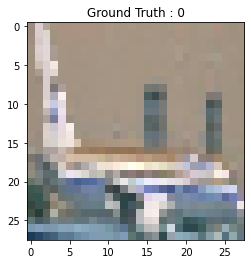

In [94]:
import matplotlib.pyplot as plt #displaying the image predicted
plt.imshow(x_train[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_train[10]))
plt.show()

In [0]:
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential() #creating the sequential model
model.add(Conv2D(64, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 10
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [88]:
h=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64) #fitting the model

Train on 5527 samples, validate on 1382 samples
Epoch 1/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.2593 - accuracy: 0.9046 - val_loss: 0.1931 - val_accuracy: 0.9253
Epoch 2/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.1615 - accuracy: 0.9381 - val_loss: 0.1410 - val_accuracy: 0.9517
Epoch 3/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.1239 - accuracy: 0.9516 - val_loss: 0.1175 - val_accuracy: 0.9560
Epoch 4/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.1106 - accuracy: 0.9552 - val_loss: 0.1038 - val_accuracy: 0.9587
Epoch 5/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.1018 - accuracy: 0.9585 - val_loss: 0.1013 - val_accuracy: 0.9598
Epoch 6/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.0934 - accuracy: 0.9622 - val_loss: 0.0963 - val_accuracy: 0.9623
Epoch 7/10
5527/5527 [==============================] - 10s 2ms/step - loss: 0.089

In [89]:
x1=model.predict_classes(x_test[[2],:]) #predicting the model
print(x1[0])
print(y_test[2])


6
[0. 0. 0. 0. 0. 0. 1. 0.]


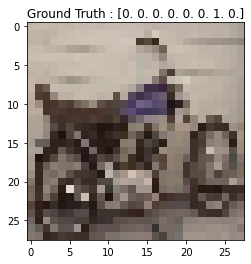

In [90]:
import matplotlib.pyplot as plt #displaying the predicted image
plt.imshow(x_test[2,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_test[2]))
plt.show()

In [0]:
model.save("jaswanth.h5") #saving the modxel

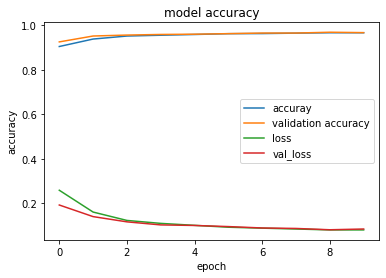

In [91]:
import matplotlib.pyplot as plt #plotting the model accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'])
plt.show()